In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r'C:\Users\ganga\OneDrive\Desktop\Natural Language Processing\Fake news classifier')
os.listdir()

['submit.csv', 'test.csv', 'train.csv']

In [3]:
data = pd.read_csv('train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
data.shape

(20800, 5)

In [5]:
data = data.dropna()

In [6]:
data.shape

(18285, 5)

In [7]:
messages = data.copy()
messages = messages.reset_index(drop=True)

In [8]:
messages.shape

(18285, 5)

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [11]:
stemmer = PorterStemmer()

In [15]:
# Cleaning
cleaned_data = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    words = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    words = ' '.join(words)
    cleaned_data.append(words)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(cleaned_data).toarray()

In [18]:
y = messages['label']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_predict = classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
score = accuracy_score(y_test, y_predict)
score

0.8975973487986744

In [24]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[3220,  199],
       [ 419, 2197]], dtype=int64)

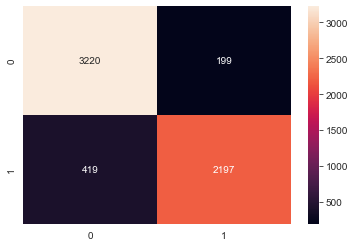

In [28]:
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3419
           1       0.92      0.84      0.88      2616

    accuracy                           0.90      6035
   macro avg       0.90      0.89      0.89      6035
weighted avg       0.90      0.90      0.90      6035



In [34]:
# Hyper parameter tuning
previous_score = 0
for i in np.arange(0.1, 1, 0.1):
    sub_classifier = MultinomialNB(alpha=i)
    sub_classifier.fit(X_train, y_train)
    pred = sub_classifier.predict(X_test)
    score = accuracy_score(y_test, pred)
    if score>previous_score:
        previous_score = score
        classifier = sub_classifier
    print('Accuracy of model at alpha = {} is {}'.format(i, score))

Accuracy of model at alpha = 0.1 is 0.8947804473902237
Accuracy of model at alpha = 0.2 is 0.8966031483015742
Accuracy of model at alpha = 0.30000000000000004 is 0.8967688483844242
Accuracy of model at alpha = 0.4 is 0.8961060480530241
Accuracy of model at alpha = 0.5 is 0.8966031483015742
Accuracy of model at alpha = 0.6 is 0.8966031483015742
Accuracy of model at alpha = 0.7000000000000001 is 0.8971002485501243
Accuracy of model at alpha = 0.8 is 0.8977630488815245
Accuracy of model at alpha = 0.9 is 0.8979287489643745


In [30]:
# Another model
from sklearn.linear_model import PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier()

In [31]:
pa_classifier.fit(X_train, y_train)
pac_pred = pa_classifier.predict(X_test)

In [32]:
pac_score = accuracy_score(y_test, pac_pred)
pac_score

0.9257663628831815

In [33]:
print(classification_report(y_test, pac_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3419
           1       0.89      0.94      0.92      2616

    accuracy                           0.93      6035
   macro avg       0.92      0.93      0.92      6035
weighted avg       0.93      0.93      0.93      6035

